Analizamos al roedor y mamífero Possum (Zarigüeya) a través de nuestro Dataset y llegamos a las siguientes conclusiones:

 - Entre 0.10 y 0.29: Hay una correlación débil entre la edad y la cola, el largo de las patas,los ojos, el largo de los dientes, el cráneo.


- Entre 0.30 y 0.60: Hay correlación moderada entre la edad y la longitud de la cabeza, el torso y el abdomen.


- Entre 0.60 y 1: Sin embargo no podemos establecer que haya un correlación fuerte entre otras variables.

Hipotesis alternativa (H1): A mayor tamaño de abdomen, zarigüeya más vieja
Hipotesis nula (H0): A mayor tamaño de abdomen, la zarigüeya más joven (queremos rechazar)

Tomamos de referencia p_valor(0,05)

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

¿Qué diferencia existe el error de tipo I y el error de tipo II?

 - En el error de Tipo I rechazamos la hipótesis nula cuando es verdadera, en nuestro caso, rechazamos que a mayor tamaño de abdomen, la zarigüeya sea más joven

 - En el error de Tipo II la hipótesis nula es falsa, pero no la rechazamos, en nuestro caso, es falso que a mayor tamaño de abdomen la zarigüeya es más joven, pero lo asumimos como cierto.

¿Qué es la asimetría?

- Valga la redundancia, la asimetría es la falta de simetría que presenta una distribución teniendo en cuenta la media. Una distribución asimétrica puede tener una curva sesgada hacía la derecha o la izquierda. 

La asimetría se puede determinar según la forma en que la media, la mediana y la moda de una distribución se relacionan entre sí. Podemos tener: 

- **Distribuciones asimetricas positivas**: Cuando la media es mayor que la mediana y la moda.



- **Distribuciones asimetricas negativas**: Cuando la media es menor que la mediana y la moda. 



- **Distribuciones simetricas**: Cuando la media es igual a la mediana y la moda. 

¿Es vuestra variable respuesta asimétrica?

- 

¿Qué tipo de curtosis presenta vuestra variable respuesta?

¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import statsmodels.api as sm
from scipy.stats import kstest
from scipy import stats

In [28]:
df = pd.read_csv("../Da-promoB-Modulo-3-Sprint-1-Lucia-Natalia/Datos/possum.csv", index_col=0)

In [29]:
df.head(2)

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
case,,,,,,,,,,,,,
1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0


Vamos a generar una muestra aleatoria de distribución normal para tomarlo como referencia

In [30]:
mu, sigma = 0, 1 

datos_normales = np.random.normal(mu, sigma, 1000) # 1000 corresponde con el número de datos que vamos a generar. 
datos_normales[:20]

array([ 0.61704861,  1.5317063 , -0.9371421 ,  0.37293836,  0.24821939,
       -0.99926948, -0.11622621,  0.21519464,  0.35329731,  0.32428278,
        1.83434866, -3.26108527, -0.24194717,  1.94152994, -1.56057966,
       -1.56938992,  0.92356356,  0.66848129,  0.4871052 , -0.44612801])

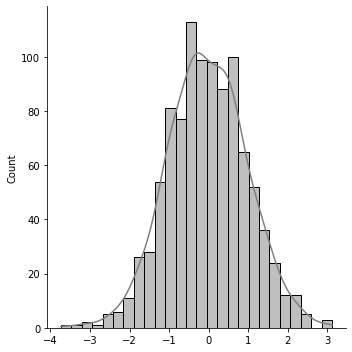

In [35]:
# graficamos los datos
sns.displot(datos_normales, kde = True, color = "grey");

In [14]:
# vamos a generar también unos datos no normales para hacer comparaciones a lo largo de la lección

datos_no_normales = np.random.random(1000) 
datos_no_normales[:20]

array([0.61899086, 0.74858309, 0.36807773, 0.88396746, 0.36862281,
       0.97541277, 0.75556938, 0.71537831, 0.40521107, 0.18856372,
       0.44505243, 0.62110004, 0.13402205, 0.29394709, 0.39344816,
       0.48566762, 0.36077308, 0.40773973, 0.18979204, 0.11526417])

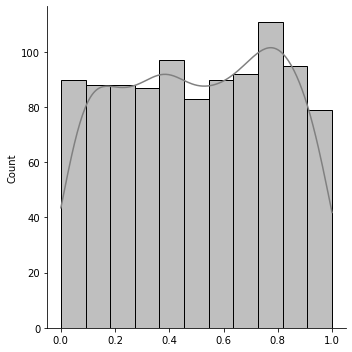

In [36]:
# graficamos los datos
sns.displot(datos_no_normales, kde = True, color = "grey");

Ahora vamos a comprobar que tipo de distribución tienen nuestras variables predictoras (belly, chest, hdlngth) y respuesta (age)

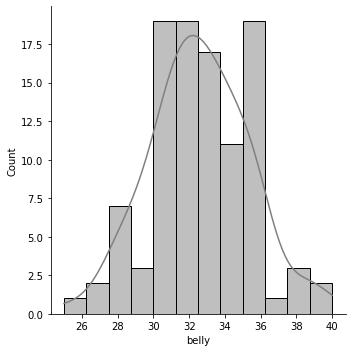

In [31]:
# graficamos los datos
sns.displot(df["belly"], kde = True, color = "grey");

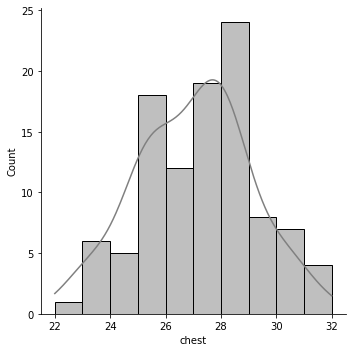

In [33]:
sns.displot(df["chest"], kde = True, color = "grey");

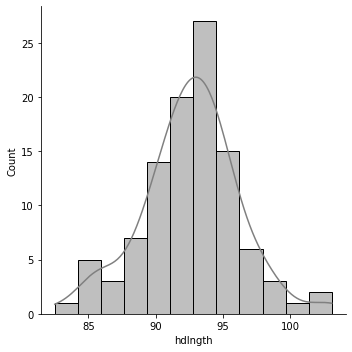

In [34]:
sns.displot(df["hdlngth"], kde = True, color = "grey");

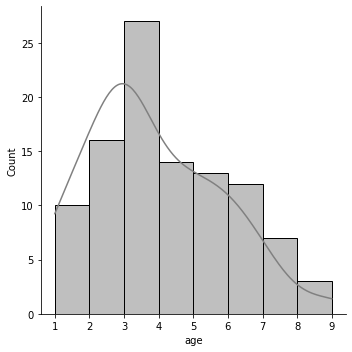

In [37]:
# graficamos los datos
sns.displot(df["age"], kde = True, color = "grey");

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


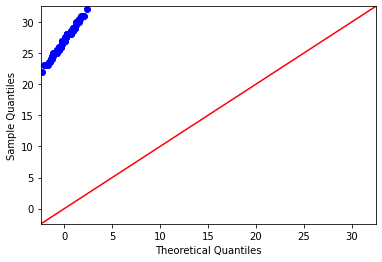

In [41]:
#Esto no tenemos muy claro si nos lo piden en el ejercicio por lo que lo dejamos en standby
sm.qqplot(df["chest"], line ='45');

/home/adalaber/Descargas/yes/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


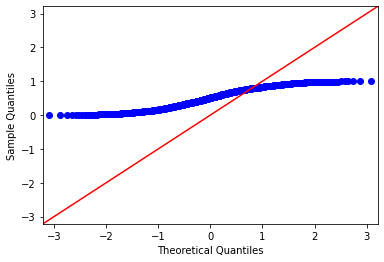

In [20]:
#Esto no tenemos muy claro si nos lo piden en el ejercicio por lo que lo dejamos en standby
sm.qqplot(datos_no_normales, line ='45');

Los valores están muy próximos a 0 ya que tienen una distribución simétrica normal

In [42]:
skew(df["belly"])

0.07290364111332884

El valor está muy próximo a 0 por tanto es una distribución simétrica normal

In [43]:
skew(df["chest"])

-0.05470688688328307

In [44]:
skew(df["hdlngth"])

-0.055163025308656875

In [45]:
skew(df["age"])

nan

In [23]:
# lo primero que vamos a hacer es convertir nuestro datos en un dataframe

diccionario = {"datos_normales": datos_normales, "datos_no_normales": datos_no_normales}

df = pd.DataFrame(diccionario)
df.head()

,datos_normales,datos_no_normales
0,0.094990,0.618991
1,1.257035,0.748583
2,-1.371779,0.368078
3,-1.503808,0.883967
4,0.431873,0.368623


In [14]:
df["datos_normales"].skew()

-0.05407832618682235

In [15]:
df["datos_no_normales"].skew()

0.03404259011586656

In [16]:
# importamos la librería que necesitamos

from scipy.stats import kurtosistest

In [17]:
kurtosistest(datos_normales)

KurtosistestResult(statistic=-0.4105876083378449, pvalue=0.6813749515631511)

In [18]:
kurtosistest(datos_no_normales)

KurtosistestResult(statistic=-26.22281309265504, pvalue=1.4601156929936518e-151)

In [19]:
# para los datos normales

kurtosistest(df['datos_normales'])

KurtosistestResult(statistic=-0.4105876083378449, pvalue=0.6813749515631511)

In [20]:
# para los datos no normales

kurtosistest(df["datos_no_normales"])

KurtosistestResult(statistic=-26.22281309265504, pvalue=1.4601156929936518e-151)

In [21]:
stats.shapiro(df["datos_normales"])

ShapiroResult(statistic=0.9980247020721436, pvalue=0.2931349277496338)

In [22]:
stats.shapiro(df["datos_no_normales"])

ShapiroResult(statistic=0.9541120529174805, pvalue=3.9146484616472095e-17)

In [24]:
kstest(df["datos_normales"], 'norm')

KstestResult(statistic=0.03450170215662729, pvalue=0.18060755112268045)

In [25]:
kstest(df["datos_no_normales"], 'norm')

KstestResult(statistic=0.5001477137915041, pvalue=7.599897249333981e-232)